<a href="https://colab.research.google.com/github/sztyberj/DrugClassification_RandomForest/blob/main/Drug_Classification_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Drugs classification using Random Forest algorythm

**Columns**:


*Age*

*Sex*

*Blood Pressure Levels (BP)*

*Cholesterol Levels*

*Na to Potassium Ration*

*Drug*


##Importing Libraries

In [281]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import call
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from IPython.display import Image
from sklearn.tree import export_graphviz

## Getting data


In [282]:
data = pd.read_csv('https://raw.githubusercontent.com/sztyberj/DrugClassification_RandomForest/main/drug200.csv')
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Data exploration



In [283]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [284]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [285]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [287]:
data.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

##Categorical columns

In [288]:
cat_cols=data.select_dtypes(include=object).columns.to_list()
cat_cols

['Sex', 'BP', 'Cholesterol', 'Drug']

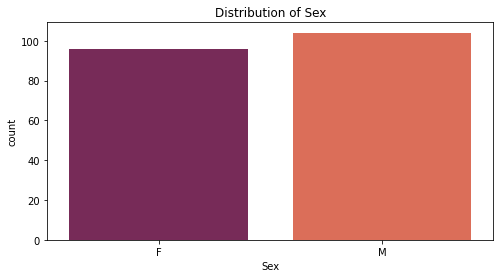

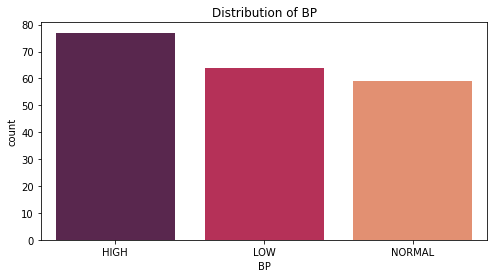

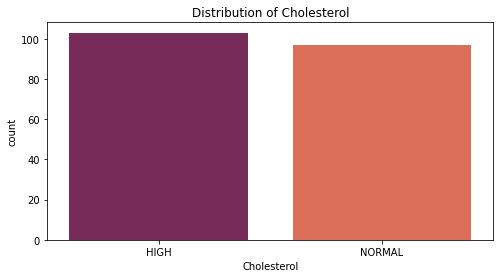

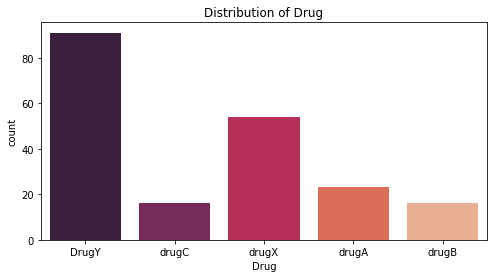

In [289]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data = data, x=col, palette="rocket")
    plt.title(f"Distribution of {col}")   

##Numerical columns

In [290]:
num_cols=data.select_dtypes(include=np.number).columns.to_list()
num_cols

['Age', 'Na_to_K']

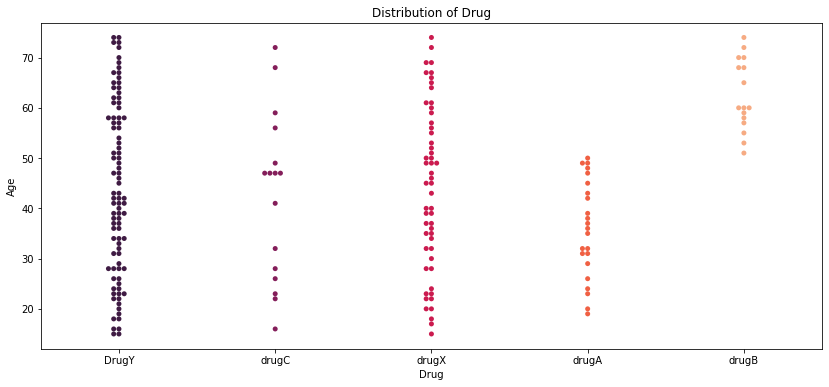

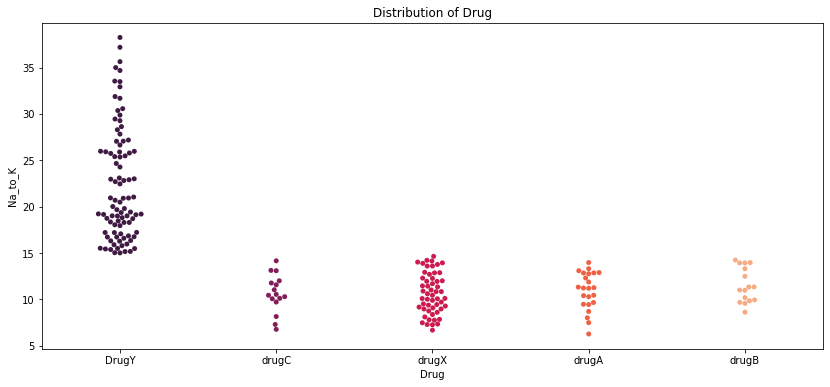

In [291]:
for col in num_cols:
    plt.figure(figsize=(14,6))
    sns.swarmplot(data=data,x='Drug',y=col, palette="rocket")
    plt.title(f"Distribution of Drug")

##Label encoder

In [292]:
def label_encoder(y):
    le = LabelEncoder()
    data[y] = le.fit_transform(data[y])

In [293]:
label_list = ["Sex","BP","Cholesterol","Na_to_K"]

for l in label_list:
    label_encoder(l)

In [294]:
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,DrugY
1,47,1,1,0,89,drugC
2,47,1,1,0,43,drugC
3,28,0,2,0,10,drugX
4,61,0,1,0,133,DrugY


##Splitting data into train and test




In [295]:
x = data.drop(["Drug"],axis=1)
y = data.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (160, 5)
x_test shape: (40, 5)
y_train shape: (160, 1)
y_test shape: (40, 1)


##Training and Cross varifying the model


In [296]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, np.ravel(y_train), cv=5)
rfc.fit(x_train, np.ravel(y_train))

print("Train Score:", np.mean(accuracies))
print("Test Score:", rfc.score(x_test,y_test))

Train Score: 0.98125
Test Score: 1.0


##Feature importances

In [297]:
feature_importances=pd.DataFrame(rfc.feature_importances_,index=x.columns.to_list(),columns=['Importance']).sort_values(by='Importance',ascending=True)
feature_importances

,Importance
Sex,0.015382
Cholesterol,0.043107
Age,0.139685
BP,0.242259
Na_to_K,0.559567


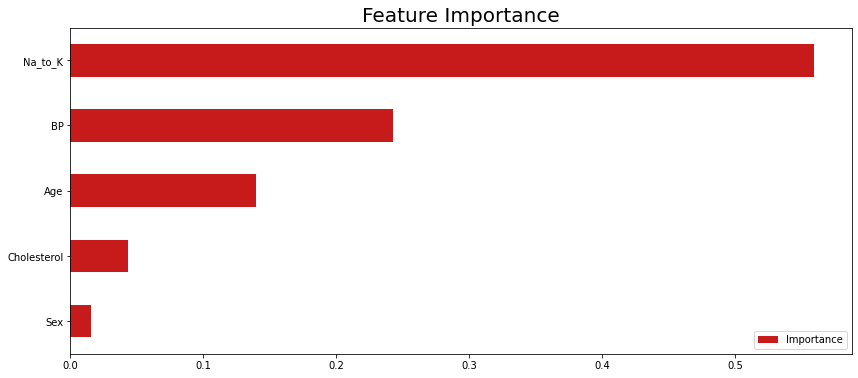

In [298]:
feature_importances.plot(kind='barh',figsize=(14,6), color='#c71a1a');
plt.title("Feature Importance",fontsize=20);

##Decision making visualization


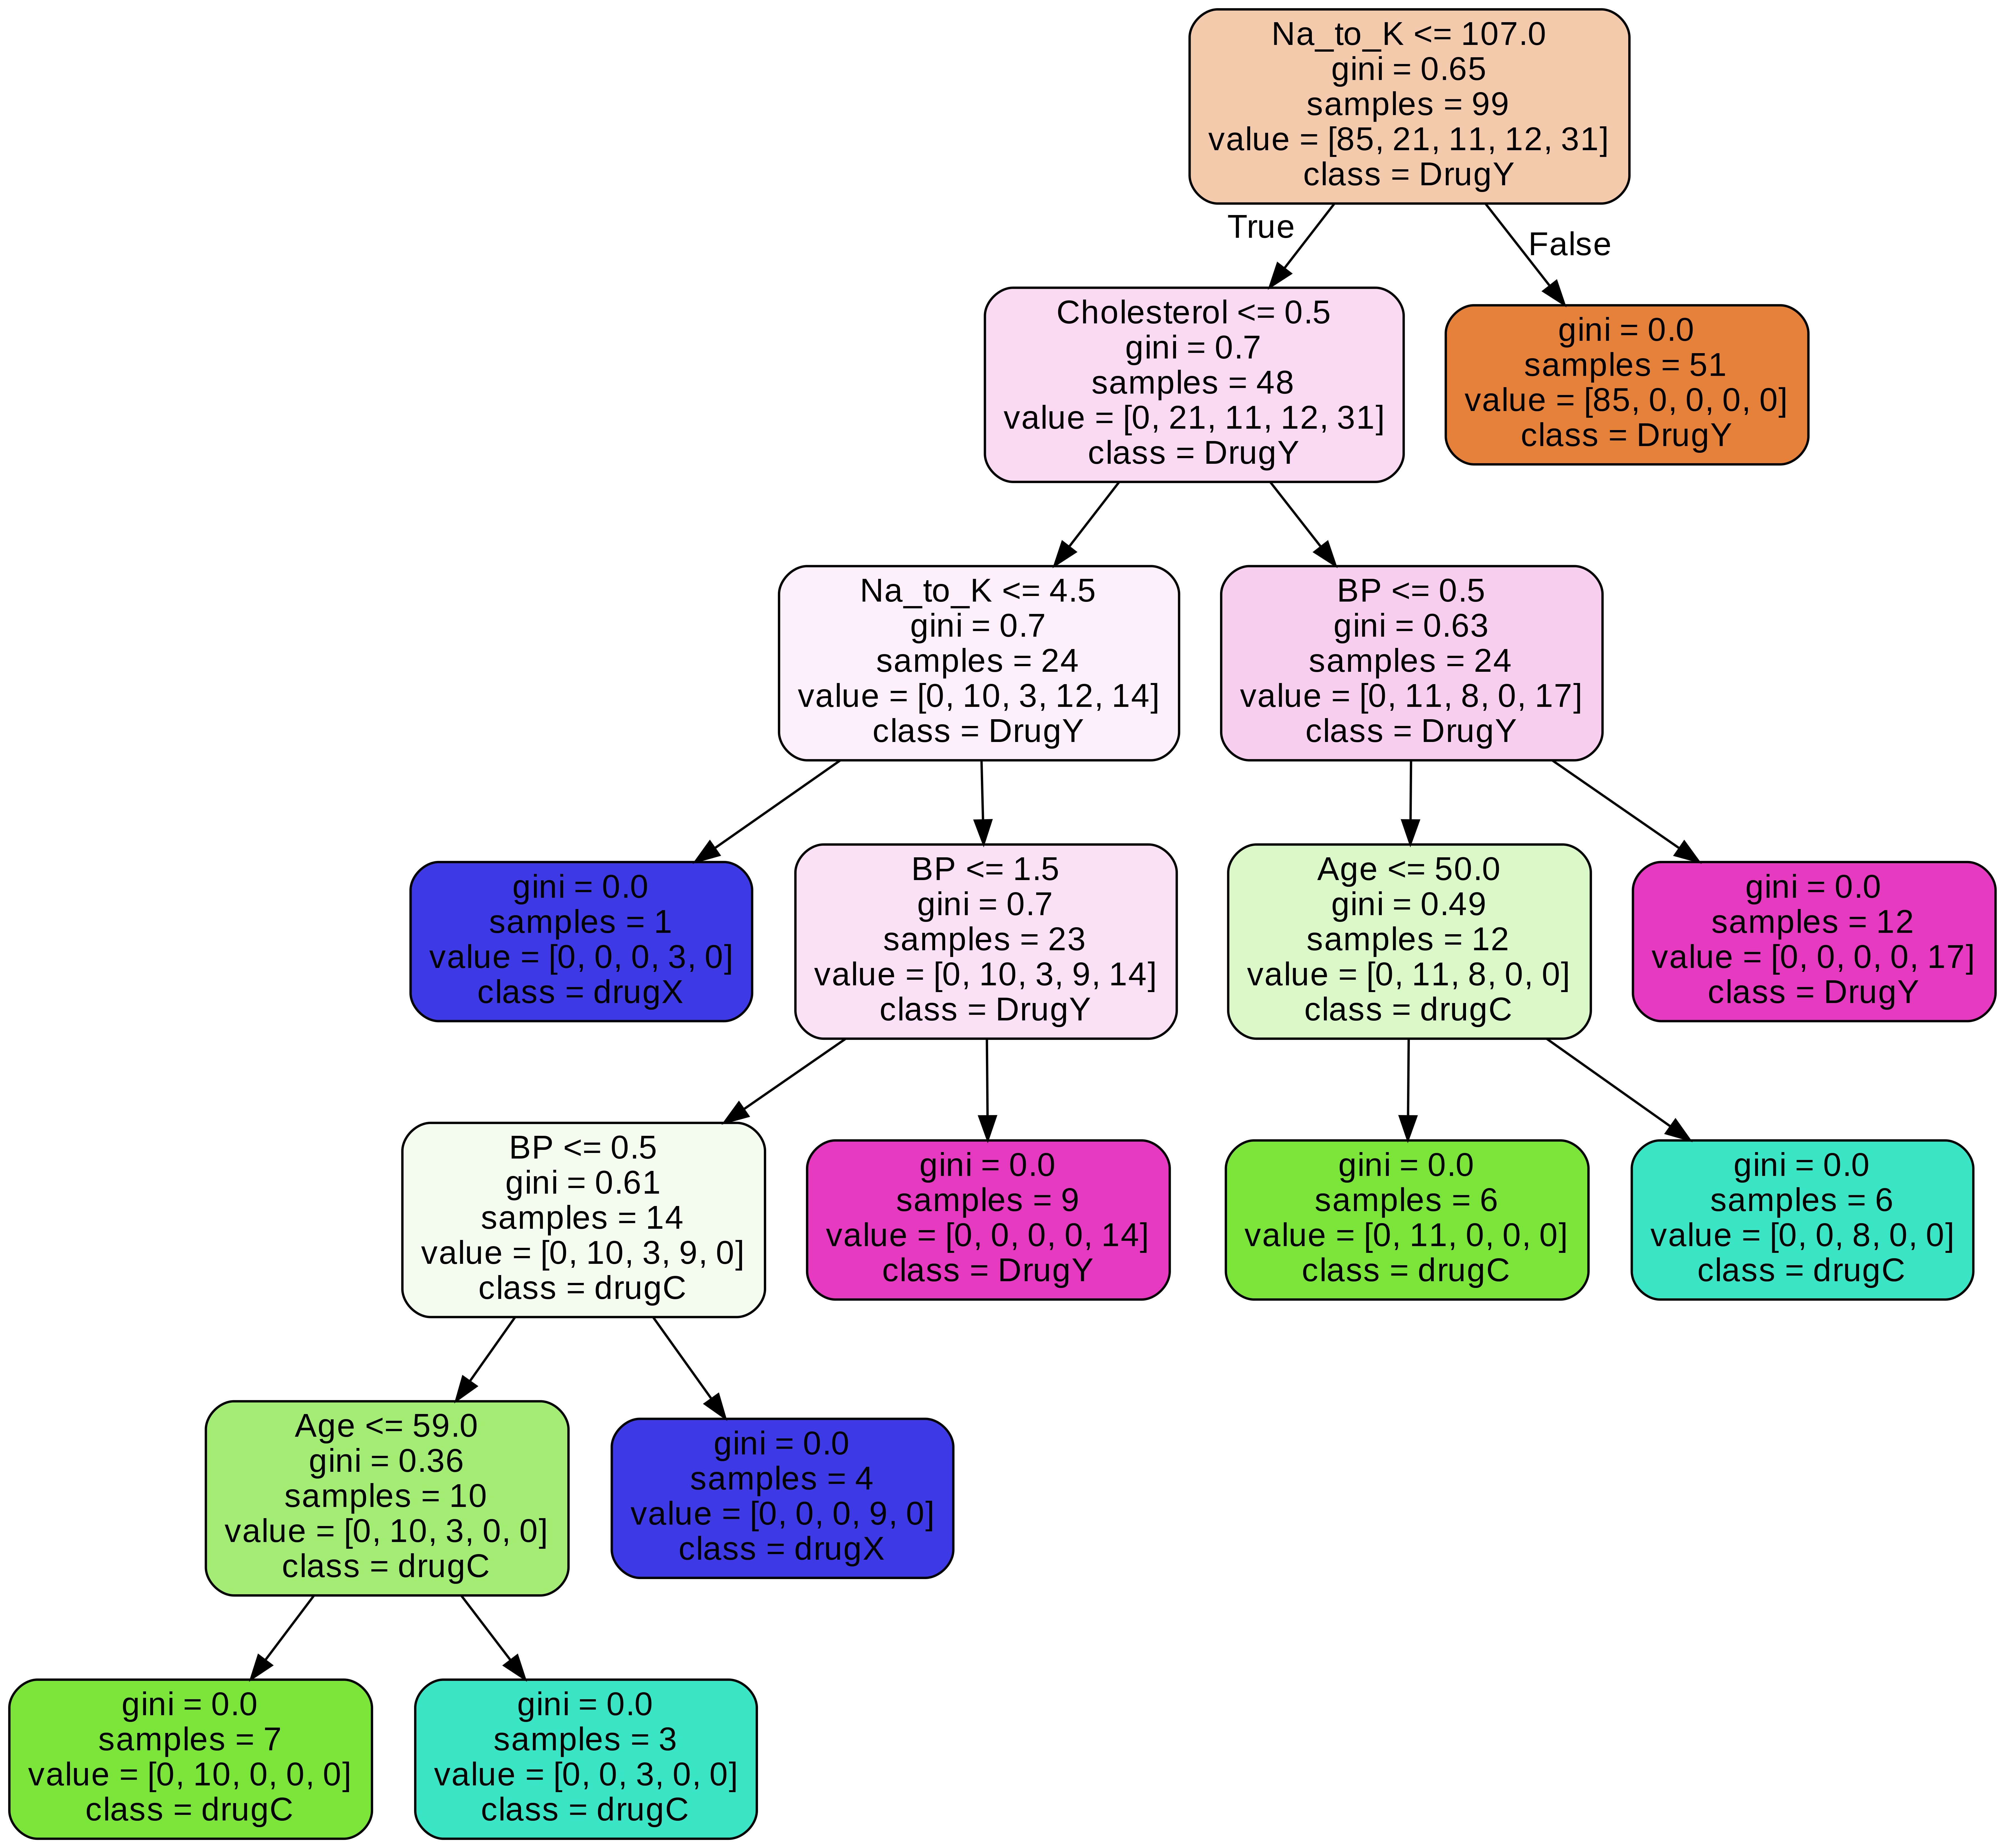

In [299]:
estimator = rfc.estimators_[5]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = x.columns,
                class_names = data.Drug,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
Image(filename = 'tree.png')